In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
Microsoft_Data=pd.read_csv('MSFT.csv')
Microsoft_Data

,Date,Close/Last,Volume,Open,High,Low
0,06/09/2021,$253.59,17937630,$253.81,$255.53,$253.21
1,06/08/2021,$252.57,22455000,$255.16,$256.01,$252.51
2,06/07/2021,$253.81,23079170,$249.98,$254.09,$249.81
3,06/04/2021,$250.79,25281090,$247.76,$251.65,$247.51
4,06/03/2021,$245.71,25307710,$245.22,$246.34,$243
...,...,...,...,...,...,...
2511,06/16/2011,$23.995,57077140,$23.75,$24.1,$23.65
2512,06/15/2011,$23.74,49274190,$24,$24.01,$23.67
2513,06/14/2011,$24.22,42862050,$24.3,$24.45,$24.19
2514,06/13/2011,$24.04,47558330,$23.79,$24.19,$23.7


In [3]:
#To find the dimension of our dataset
Microsoft_Data.shape

(2516, 6)

In [4]:
Microsoft_Data.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [5]:
Microsoft_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2516 non-null   object
 1   Close/Last  2516 non-null   object
 2   Volume      2516 non-null   int64 
 3   Open        2516 non-null   object
 4   High        2516 non-null   object
 5   Low         2516 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [6]:
print(Microsoft_Data['Date'].head())
Microsoft_Data['Date'].dtype

0    06/09/2021
1    06/08/2021
2    06/07/2021
3    06/04/2021
4    06/03/2021
Name: Date, dtype: object


dtype('O')

In [7]:
Microsoft_Data['Date'] = pd.to_datetime(Microsoft_Data['Date'])

In [8]:
Microsoft_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   object        
 2   Volume      2516 non-null   int64         
 3   Open        2516 non-null   object        
 4   High        2516 non-null   object        
 5   Low         2516 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 118.1+ KB


In [9]:
Microsoft_Data.set_index('Date', inplace=True)

In [10]:
Microsoft_Data.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [11]:
Microsoft_Data.rename(columns=({'Close/Last':'Close'}),inplace=True)

In [12]:
Microsoft_Data.columns

Index(['Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [13]:
for column in Microsoft_Data[['Close','Open', 'High', 'Low']]:
    Microsoft_Data[column] = Microsoft_Data[column].str.replace('$', '')

In [14]:
Microsoft_Data

,Close,Volume,Open,High,Low
Date,,,,,
2021-06-09,253.59,17937630,253.81,255.53,253.21
2021-06-08,252.57,22455000,255.16,256.01,252.51
2021-06-07,253.81,23079170,249.98,254.09,249.81
2021-06-04,250.79,25281090,247.76,251.65,247.51
2021-06-03,245.71,25307710,245.22,246.34,243
...,...,...,...,...,...
2011-06-16,23.995,57077140,23.75,24.1,23.65
2011-06-15,23.74,49274190,24,24.01,23.67
2011-06-14,24.22,42862050,24.3,24.45,24.19


In [15]:
Microsoft_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   2516 non-null   object
 1   Volume  2516 non-null   int64 
 2   Open    2516 non-null   object
 3   High    2516 non-null   object
 4   Low     2516 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [16]:
Microsoft_Data[['Close','Open', 'High', 'Low']]=Microsoft_Data[['Close','Open', 'High', 'Low']].apply(pd.to_numeric)

In [17]:
Microsoft_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   Volume  2516 non-null   int64  
 2   Open    2516 non-null   float64
 3   High    2516 non-null   float64
 4   Low     2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


Summary statistics of Dataset

In [18]:
Microsoft_Data.describe()

,Close,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,82.296777,3.579881e+07,82.263120,83.044114,81.463854
std,61.287934,1.925038e+07,61.265407,61.928395,60.595341
min,23.705000,7.425603e+06,23.750000,24.010000,23.650000
25%,36.682500,2.339082e+07,36.817500,36.920000,36.280000
50%,55.130000,3.099882e+07,54.970000,55.527500,54.497500
75%,108.775000,4.311431e+07,108.950000,109.802500,107.837500
max,261.970000,2.475342e+08,261.660000,263.190000,260.170000


In [19]:
Microsoft_Data.to_csv('Cleaned MSFT.csv')

Stock data line graph

(array([14610., 14975., 15340., 15706., 16071., 16436., 16801., 17167.,
        17532., 17897., 18262., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

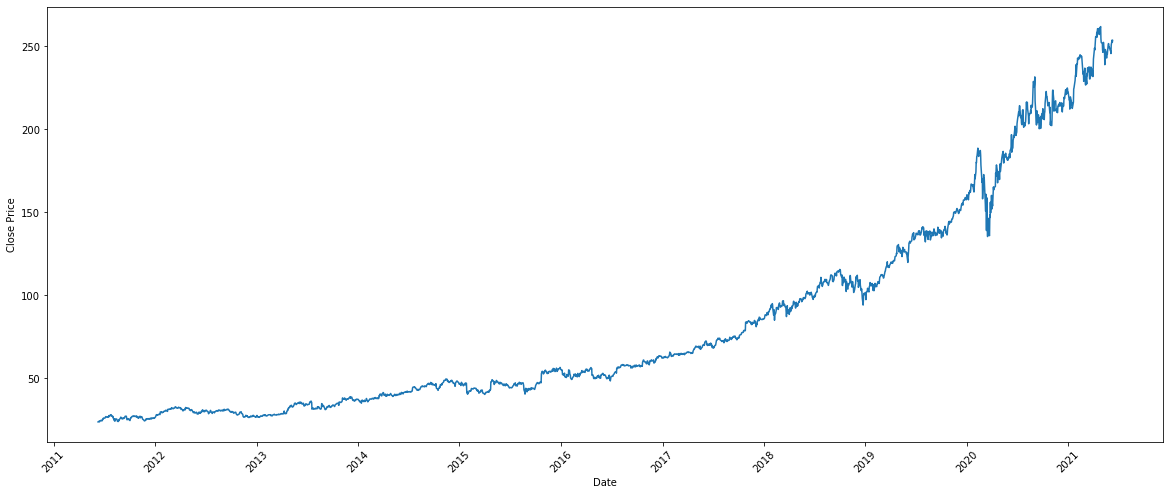

In [20]:
plt.figure(figsize=(20,8))
plt.plot('Close',data=Microsoft_Data)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

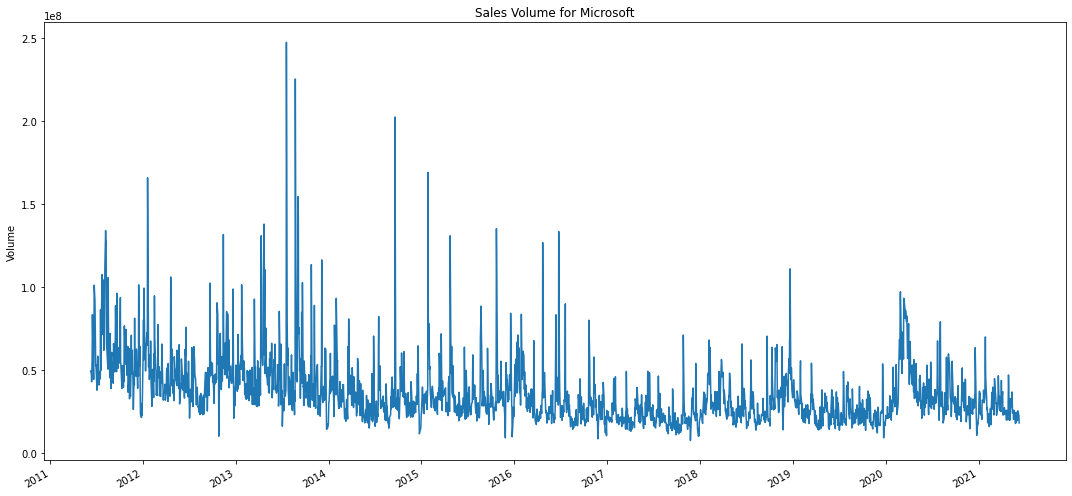

In [21]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
Microsoft_Data['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Microsoft")
plt.tight_layout()

Creation of the new column "Price difference"

In [22]:
Microsoft_Data['PriceDiff'] = Microsoft_Data['Close'].shift(-1) - Microsoft_Data['Close']
print(Microsoft_Data['PriceDiff'])

Date
2021-06-09   -1.020
2021-06-08    1.240
2021-06-07   -3.020
2021-06-04   -5.080
2021-06-03    1.590
              ...  
2011-06-16   -0.255
2011-06-15    0.480
2011-06-14   -0.180
2011-06-13   -0.335
2011-06-10      NaN
Name: PriceDiff, Length: 2516, dtype: float64


Creation of the new column "Daily returns"

In [23]:
Microsoft_Data['Daily returns'] = Microsoft_Data['PriceDiff'] /Microsoft_Data['Close']
print(Microsoft_Data['Daily returns'])

Date
2021-06-09   -0.004022
2021-06-08    0.004910
2021-06-07   -0.011899
2021-06-04   -0.020256
2021-06-03    0.006471
                ...   
2011-06-16   -0.010627
2011-06-15    0.020219
2011-06-14   -0.007432
2011-06-13   -0.013935
2011-06-10         NaN
Name: Daily returns, Length: 2516, dtype: float64


<AxesSubplot:>

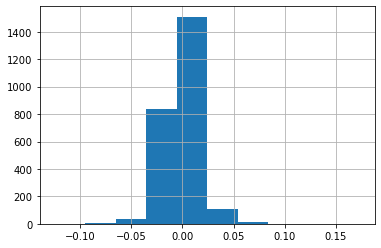

In [24]:
Microsoft_Data['Daily returns'].hist()

Text(0.5, 1.0, 'MICROSOFT Returns')

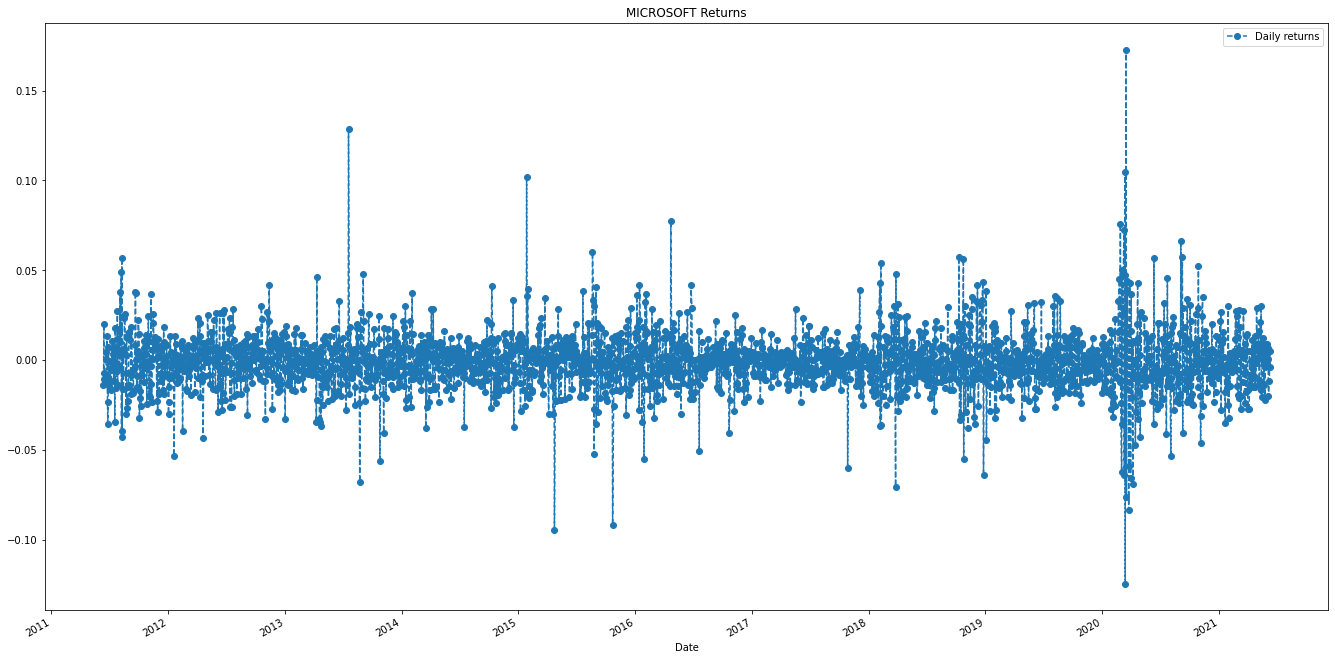

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
fig.set_figheight(12)
fig.set_figwidth(23)
Microsoft_Data['Daily returns'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MICROSOFT Returns')

In [26]:
mean = Microsoft_Data['Daily returns'].mean()
std = Microsoft_Data['Daily returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = -0.0008084449868902154
Std deviation = 0.016371513220857496


generally returns are negative but remember that this only considers the returns on a day-to-day basis and so it just tells you that in general the return if you buy and sell on the same day, you will make a loss.

Text(0.5, 1.0, 'Microsoft')

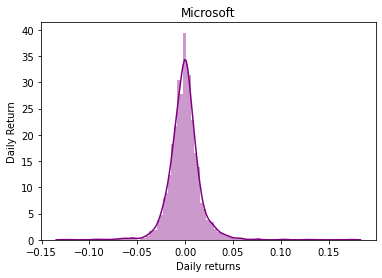

In [27]:
sns.distplot(Microsoft_Data['Daily returns'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('Microsoft')

<AxesSubplot:>

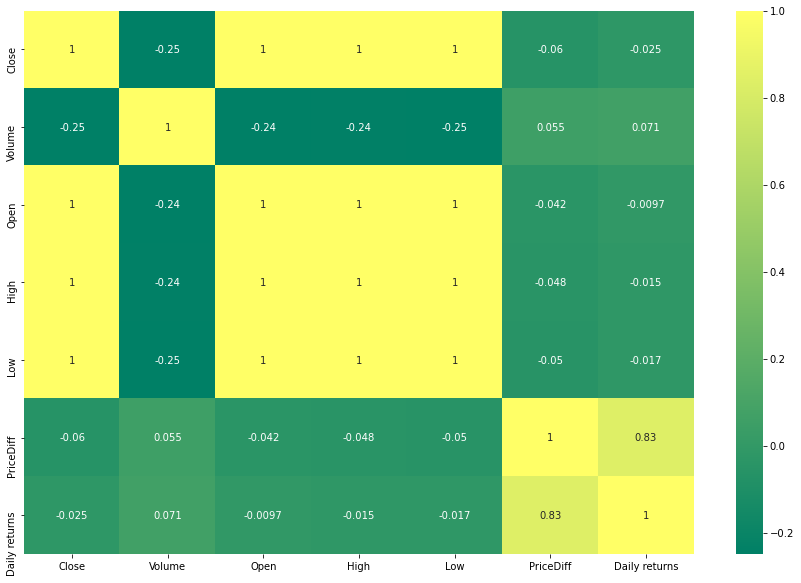

In [28]:
plt.subplots(figsize=(15,10))
sns.heatmap(Microsoft_Data.corr(), annot=True, cmap='summer')

Implementation of the Rolling Window calculation

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM)

In [29]:
Microsoft_Data['MA10'] = Microsoft_Data['Close'].rolling(10).mean()
Microsoft_Data['MA20'] = Microsoft_Data['Close'].rolling(20).mean()
Microsoft_Data['MA50'] = Microsoft_Data['Close'].rolling(50).mean()

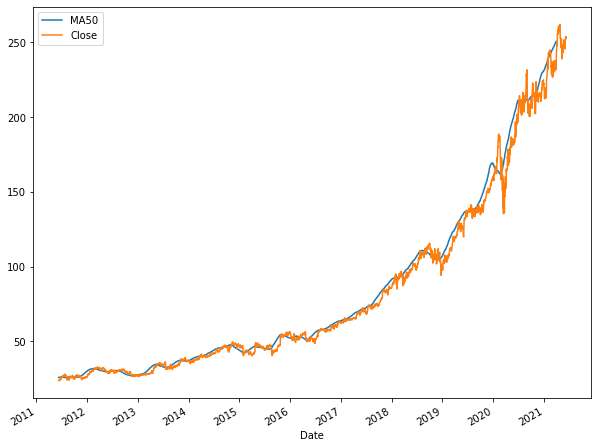

In [30]:
#plot the Moving Average 50
plt.figure(figsize=(10, 8))
Microsoft_Data['MA50'].plot(label='MA50')
Microsoft_Data['Close'].plot(label='Close')
plt.legend()
plt.show()

The above shown is a chart of ten years of Microsoft Stock with simple moving averages. The blue line is the shorter, 50-day moving average. Most traders will use the cross of the short-term moving average above the longer-term moving average to initiate a long position and identify the start of a bullish trend. As we can see there is a growing trend.

Text(0.5, 1.0, 'MICROSOFT')

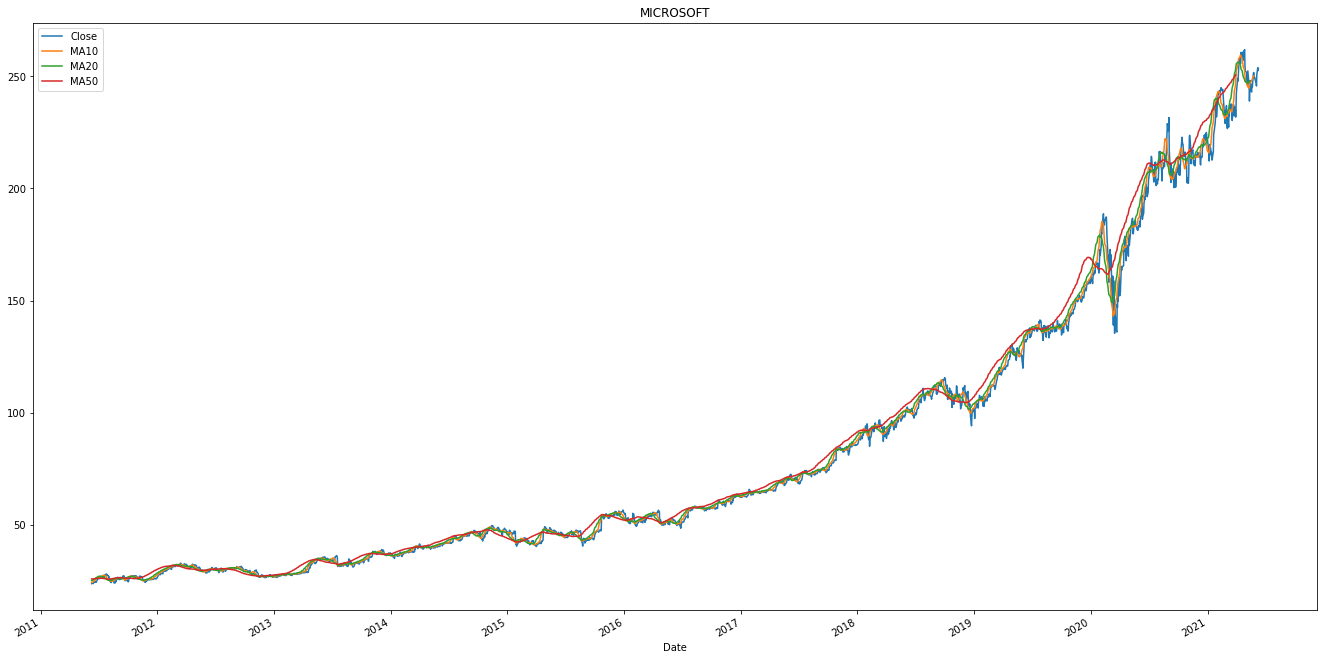

In [31]:
#plot the Moving Average 10,20,50 with date
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
fig.set_figheight(12)
fig.set_figwidth(23)
Microsoft_Data[['Close', 'MA10', 'MA20', 'MA50']].plot(ax=axes[0,0])
axes[0,0].set_title('MICROSOFT')

In [32]:
Microsoft_Data['Shares'] = [1 if Microsoft_Data.loc[ei, 'MA10']>Microsoft_Data.loc[ei, 'MA50'] else 0 for ei in Microsoft_Data.index]

Calculating the profit

The profit is calculated as the close price of (tomorrow - the close price of today) Otherwise the profit is 0

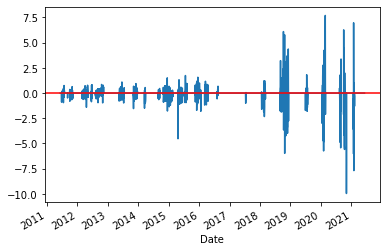

In [33]:
Microsoft_Data['Close1'] = Microsoft_Data['Close'].shift(-1)
Microsoft_Data['Profit'] = [Microsoft_Data.loc[ei, 'Close1'] - Microsoft_Data.loc[ei, 'Close'] if Microsoft_Data.loc[ei, 'Shares']==1 else 0 for ei in Microsoft_Data.index]
Microsoft_Data['Profit'].plot()
plt.axhline(y=0, color='red')

## Calculating the risk of price drop

Adding column regarding the return

In [34]:
Microsoft_Data['LogReturn'] = np.log(Microsoft_Data['Close']).shift(-1) - np.log(Microsoft_Data['Close'])
print(Microsoft_Data['LogReturn'])

Date
2021-06-09   -0.004030
2021-06-08    0.004898
2021-06-07   -0.011970
2021-06-04   -0.020464
2021-06-03    0.006450
                ...   
2011-06-16   -0.010684
2011-06-15    0.020017
2011-06-14   -0.007460
2011-06-13   -0.014033
2011-06-10         NaN
Name: LogReturn, Length: 2516, dtype: float64


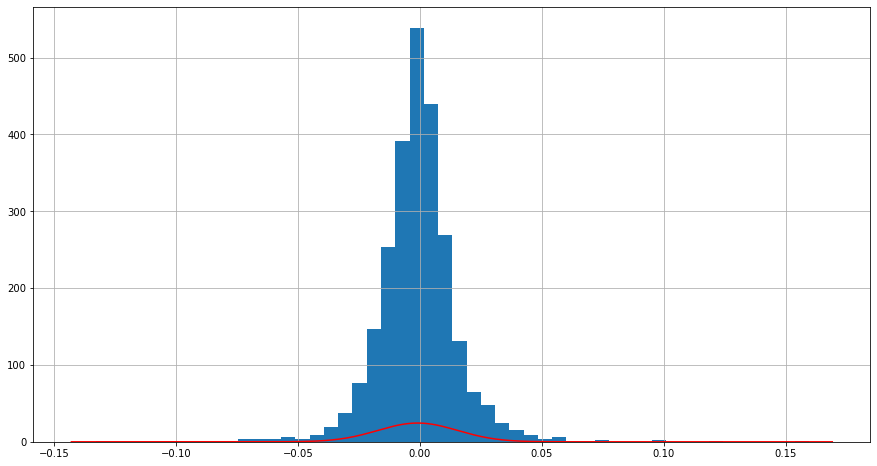

In [35]:
from scipy.stats import norm
mu = Microsoft_Data['LogReturn'].mean()
sigma = Microsoft_Data['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(Microsoft_Data['LogReturn'].min()-0.01, Microsoft_Data['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

Microsoft_Data['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

Calculating the probability of 10 percentage price drop in a day

In [36]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  6.63500715339178e-10


Calculating the probability of 25 percentage price drop over a year

In [37]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)

The probability of dropping over 25% over a year:  None


Calculate Value at risk (VaR)

In [38]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk is: ', VaR," (5% quantile)")
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

Single day value at risk is:  -0.027811226763752573  (5% quantile)
95% quantile  0.02592650883671092


Estimate the average stock return with 90% Confidence Interval

In [39]:
Microsoft_Data['logReturn'] = np.log(Microsoft_Data['Close'].shift(-1)) - np.log(Microsoft_Data['Close'])
sample_size = Microsoft_Data['logReturn'].shape[0]
sample_mean = Microsoft_Data['logReturn'].mean()
sample_std = Microsoft_Data['logReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [40]:
print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (-0.0014780249223255875, -0.00040669300471605444)


There is a 90% chance that the confidence interval of (-0.0014624559946136743, -0.00037638497996682276) contains the average stock return.

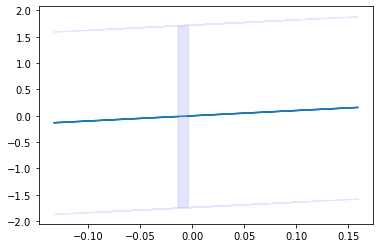

In [41]:
# Create the data set
x = Microsoft_Data['logReturn']
y = np.sin(x)

#Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)

# Plot the sinus function
plt.plot(x, y)

# Plot the confidence interval
plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)

plt.show()

importing combined filtered microsoft datasets separate for headlines_years, historicalmarkethealines and security headlines

In [42]:
df=pd.read_csv('filterMSFT_Totalheadlines_years.csv')
df1=pd.read_csv('filterMSFT_gethistoricalmarketheadlines.csv')
df2=pd.read_csv('filterMSFT_Totalsecurityheadlines.csv')

In [43]:
print(df)

            Date                                          Headlines
0     02-01-2015  What to expect from Apple in 2015 beyond its s...
1     03-01-2015  Mountie: An inexpensive and innovative way to ...
2     05-01-2015  SIM-free iPhone 6, 6 Plus reportedly debuting ...
3     06-01-2015  Technology Transforming Cars Into "Phones On W...
4     09-01-2015  Samsung is reportedly making a secret new chip...
...          ...                                                ...
1300  16-06-2021  Apple's Tim Cook: Sideloading is "not in the b...
1301  17-06-2021  Apple awards grants for computer chip courses ...
1302  18-06-2021  Wells Fargo updates on its best-ideas 'Signatu...
1303  22-06-2021  Google likely to soon face antitrust claims ov...
1304  23-06-2021  French court sets date in Apple case over App ...

[1305 rows x 2 columns]


In [44]:
print(df1)

                                     Headlines Title Headlines Date
0  A year after pledging to do more on racial inj...     06-09-2021
1  Microsoft (MSFT) Gains As Market Dips: What Yo...     06-09-2021


In [45]:
print(df2)

                                       Headlines Title Headlines Date
0            Where Will Microsoft Stock Be In 5 Years?     06-08-2021
1    Microsoft's Kate Crawford: 'AI Is Neither Arti...     06-07-2021
2    Stock Alert: Alphabet Inches Past Amazon in Ma...     06-04-2021
3    Alphabet Inches Past Amazon in Market Cap. Onl...     06-04-2021
4        Noteworthy ETF Inflows: SPY, AAPL, MSFT, AMZN     06-04-2021
..                                                 ...            ...
308                      Dividend Sleuthing: Microsoft      5/26/2021
309  Microsoft is holding an Xbox and Bethesda show...      5/26/2021
310  Microsoft Azure as Big as AWS? What New Number...      5/26/2021
311  Microsoft CEO Teases &quot;Next Generation&quo...      5/26/2021
312  Microsoft releases Windows 10 Build 21390 with...      5/26/2021

[313 rows x 2 columns]


In [46]:
df.info()
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1305 non-null   object
 1   Headlines  1305 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Headlines Title  2 non-null      object
 1   Headlines Date   2 non-null      object
dtypes: object(2)
memory usage: 160.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Headlines Title  313 non-null    object
 1   Headlines Date   313 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


Renaming Columns

In [47]:
df1.columns

Index(['Headlines Title', 'Headlines Date'], dtype='object')

In [48]:
df1.rename(columns=({'Headlines Title':'Headlines','Headlines Date':'Date'}),inplace=True)

In [49]:
df2.columns

Index(['Headlines Title', 'Headlines Date'], dtype='object')

In [50]:
df2.rename(columns=({'Headlines Title':'Headlines','Headlines Date':'Date'}),inplace=True)

changing datatype of date

In [51]:
df['Date'] = pd.to_datetime(df['Date'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [52]:
df.info()
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1305 non-null   datetime64[ns]
 1   Headlines  1305 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 20.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Headlines  2 non-null      object        
 1   Date       2 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 160.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Headlines  313 non-null    object        
 1   Date       313 non-null    datetime64[ns]
dt

Dropping rows containing duplicate or repeated same information

In [53]:
df=df.drop_duplicates()
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()

Checking missing values

In [54]:
df.isna().sum()

Date         0
Headlines    0
dtype: int64

In [55]:
df1.isna().sum()

Headlines    0
Date         0
dtype: int64

In [56]:
df2.isna().sum()

Headlines    0
Date         0
dtype: int64

Merging three dataframes

In [57]:
News_data=pd.concat([df,df1,df2])

In [58]:
News_data

,Date,Headlines
0,2015-02-01,What to expect from Apple in 2015 beyond its s...
1,2015-03-01,Mountie: An inexpensive and innovative way to ...
2,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
3,2015-06-01,"Technology Transforming Cars Into ""Phones On W..."
4,2015-09-01,Samsung is reportedly making a secret new chip...
...,...,...
308,2021-05-26,Dividend Sleuthing: Microsoft
309,2021-05-26,Microsoft is holding an Xbox and Bethesda show...
310,2021-05-26,Microsoft Azure as Big as AWS? What New Number...
311,2021-05-26,Microsoft CEO Teases &quot;Next Generation&quo...


Removing all the punctuations from dataset. Only keeping alphabets.

In [59]:
News_data.Headlines.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
News_data.head()

,Date,Headlines
0,2015-02-01,What to expect from Apple in beyond its s...
1,2015-03-01,Mountie An inexpensive and innovative way to ...
2,2015-05-01,SIM free iPhone Plus reportedly debuting ...
3,2015-06-01,Technology Transforming Cars Into Phones On W...
4,2015-09-01,Samsung is reportedly making a secret new chip...


In [60]:
News_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 312
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1620 non-null   datetime64[ns]
 1   Headlines  1620 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 38.0+ KB


In [61]:
#We took the headlines column separately in the data variable
data=News_data['Headlines']
data

0      What to expect from Apple in      beyond its s...
1      Mountie  An inexpensive and innovative way to ...
2      SIM free iPhone      Plus reportedly debuting ...
3      Technology Transforming Cars Into  Phones On W...
4      Samsung is reportedly making a secret new chip...
                             ...                        
308                        Dividend Sleuthing  Microsoft
309    Microsoft is holding an Xbox and Bethesda show...
310    Microsoft Azure as Big as AWS  What New Number...
311    Microsoft CEO Teases  quot Next Generation quo...
312    Microsoft releases Windows    Build       with...
Name: Headlines, Length: 1620, dtype: object

Changing the case of string to lower and filtering dataset

In [62]:
data=data.str.lower()
data=data[data.str.contains("microsoft") | data.str.contains("msft")]
data

0      what to expect from apple in      beyond its s...
1      mountie  an inexpensive and innovative way to ...
2      sim free iphone      plus reportedly debuting ...
3      technology transforming cars into  phones on w...
4      samsung is reportedly making a secret new chip...
                             ...                        
308                        dividend sleuthing  microsoft
309    microsoft is holding an xbox and bethesda show...
310    microsoft azure as big as aws  what new number...
311    microsoft ceo teases  quot next generation quo...
312    microsoft releases windows    build       with...
Name: Headlines, Length: 1620, dtype: object

In [63]:
data.shape

(1620,)

Every rows are appended in a list on index basis

In [64]:
headlines1=[]
for row in range(0,len(data.index)):
    headlines1.append(''.join(str(x) for x in data.iloc[row]))

In [65]:
headlines1[0]

'what to expect from apple in      beyond its smartwatch amazon quot s latest kindle unlimited program irks authors apple inc   aapl  gets an upward revision from angus could palm branded phones ever make a comeback  here quot s another look at apple quot s own ibeacon stock update  nyse ibm   ibm  apple partnership will bear sweet fruit for both stocks can the  quot internet of things quot  help broadcom dominate qualcomm  rare photos shed light on steve jobs  and a young silicon valley apple quot s ipad shipments in      could be    below      rf micro devices  inc   rfmd  and triquint semiconductor  tqnt  merged into qorvo inc  qrvo  apple study  only    of u s  iphone users want apple watch why apple inc   aapl  stock took a small hit going into      apple sued over shrinking free space after ios   is installed apple quot s app of the week   icycle  on thin ice   can be downloaded for free taiwan clears apple inc  and other companies for data violation company update  apple inc  na

Counts of different words in this dataset

In [66]:
most = pd.Series(' '.join(data).split()).value_counts()
most

apple        54933
quot         27857
s            21097
to           20816
the          16550
             ...  
jia              1
doses            1
arises           1
shellnut         1
finalists        1
Length: 26817, dtype: int64

In [67]:
print("Count of microsoft: ",most['microsoft'])
print("Count of msft: ",most['msft'])

Count of microsoft:  2627
Count of msft:  719


As we can saw the count is less for microsoft compared to apple i.e, word count of 2627 for microsoft and 54933 for apple. This huge difference means the word apple has occured many times in different rows as the total row count in filtered microsoft dataset is only 1620. Here, we can make a conclusion that the word 'apple' have ocuured several times in each rows of the dataset and also they counts morethan one. But in the case of word microsoft, they are not many in number, every row have atleast one.

even if we have filtered the datasets based on the keywords 'microsoft' and 'msft', there are many other words which have occured morethan these keywords in the entire dataset.

In [68]:
train= News_data[News_data['Date']<'20200101']
test= News_data[News_data['Date']>'20191231']

In [69]:
data1=train['Headlines']
data1

0      What to expect from Apple in      beyond its s...
1      Mountie  An inexpensive and innovative way to ...
2      SIM free iPhone      Plus reportedly debuting ...
3      Technology Transforming Cars Into  Phones On W...
4      Samsung is reportedly making a secret new chip...
                             ...                        
984    Apple Sues Alan and Associates for Breach of C...
985    A New York Cardiologist Claims Apple Watch use...
986    Grab  Singtel Team Up to Bid for Singapore Dig...
987    Apple Sale Alert  AirPods Pro  iPad Pro  iPhon...
988    Forget Apple quot s iPhone     This Is My Smar...
Name: Headlines, Length: 989, dtype: object

In [70]:
data1=data1.str.lower()
data1=data1[data1.str.contains("microsoft") | data1.str.contains("msft")]
data1

0      what to expect from apple in      beyond its s...
1      mountie  an inexpensive and innovative way to ...
2      sim free iphone      plus reportedly debuting ...
3      technology transforming cars into  phones on w...
4      samsung is reportedly making a secret new chip...
                             ...                        
984    apple sues alan and associates for breach of c...
985    a new york cardiologist claims apple watch use...
986    grab  singtel team up to bid for singapore dig...
987    apple sale alert  airpods pro  ipad pro  iphon...
988    forget apple quot s iphone     this is my smar...
Name: Headlines, Length: 989, dtype: object

In [71]:
data1.shape

(989,)

In [72]:
headlines2=[]
for row in range(0,len(data1.index)):
    headlines2.append(''.join(str(x) for x in data1.iloc[row]))

In [73]:
headlines2[0]

'what to expect from apple in      beyond its smartwatch amazon quot s latest kindle unlimited program irks authors apple inc   aapl  gets an upward revision from angus could palm branded phones ever make a comeback  here quot s another look at apple quot s own ibeacon stock update  nyse ibm   ibm  apple partnership will bear sweet fruit for both stocks can the  quot internet of things quot  help broadcom dominate qualcomm  rare photos shed light on steve jobs  and a young silicon valley apple quot s ipad shipments in      could be    below      rf micro devices  inc   rfmd  and triquint semiconductor  tqnt  merged into qorvo inc  qrvo  apple study  only    of u s  iphone users want apple watch why apple inc   aapl  stock took a small hit going into      apple sued over shrinking free space after ios   is installed apple quot s app of the week   icycle  on thin ice   can be downloaded for free taiwan clears apple inc  and other companies for data violation company update  apple inc  na

In [74]:
most1 = pd.Series(' '.join(data1).split()).value_counts()
most1

apple      39886
quot       19539
s          15332
to         14353
the        11321
           ...  
spiked         1
cdo            1
homrich        1
prkr           1
cctt           1
Length: 22499, dtype: int64

In [75]:
print("Count of microsoft: ",most1['microsoft'])
print("Count of msft: ",most1['msft'])

Count of microsoft:  1649
Count of msft:  521


As we can see there are more number of word count for 'Apple' than 'Microsoft' we are doing this same steps for apple filtered dataset to get insights but not for our company news analysis purpose.

In [76]:
df3=pd.read_csv('filterAAPL_Totalheadlines_years.csv')
df4=pd.read_csv('filterAAPL_gethistoricalmarketheadlines.csv')
df5=pd.read_csv('filterAAPL_Totalsecurityheadlines.csv')

In [77]:
df4.rename(columns=({'Headlines Title':'Headlines','Headlines Date':'Date'}),inplace=True)
df5.rename(columns=({'Headlines Title':'Headlines','Headlines Date':'Date'}),inplace=True)

In [78]:
df3['Date'] = pd.to_datetime(df3['Date'])
df4['Date'] = pd.to_datetime(df4['Date'])
df5['Date'] = pd.to_datetime(df5['Date'])

In [79]:
df3=df3.drop_duplicates('Headlines', keep='last')
df4=df4.drop_duplicates('Headlines', keep='last')
df5=df5.drop_duplicates('Headlines', keep='last')

In [80]:
News_data1=pd.concat([df3,df4,df5])
News_data1.Headlines.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
News_data1.head()

,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc In ...
1,2015-02-01,What to expect from Apple in beyond its s...
2,2015-03-01,Mountie An inexpensive and innovative way to ...
3,2015-04-01,Donald Yacktman on the Sources of Moats His C...
4,2015-05-01,SIM free iPhone Plus reportedly debuting ...


In [81]:
data2=data.str.lower()
data2=data2[data.str.contains("apple") | data.str.contains("aapl")]

In [82]:
headlines3=[]
for row in range(0,len(data2.index)):
    headlines3.append(''.join(str(x) for x in data2.iloc[row]))

In [83]:
most2 = pd.Series(' '.join(data2).split()).value_counts()
most2

apple          54933
quot           27835
s              21039
to             20725
the            16520
               ...  
hillenbrand        1
shaheen            1
olivia             1
aways              1
codeplex           1
Length: 26724, dtype: int64

In [84]:
print("Count of microsoft: ",most2['microsoft'])
print("Count of msft: ",most2['msft'])

Count of microsoft:  2321
Count of msft:  626
